In [28]:
#celda 1
import pandas as pd
import psycopg2
import os
import logging
from dotenv import load_dotenv
import numpy as np

# Para visualizaciones (opcional, pero común en EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración básica del logging para este notebook
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("eda_airbnb.log"),  # Guarda logs en un archivo específico para EDA
        logging.StreamHandler()  # Muestra logs en la consola
    ]
)

logging.info("Inicio del notebook de EDA (002_eda.ipynb).")

# Configuraciones de Pandas para mejor visualización
pd.set_option('display.max_columns', None) # Mostrar todas las columnas
pd.set_option('display.max_rows', 100) # Mostrar hasta 100 filas
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Formato para floats

2025-05-11 22:11:01,988 - INFO - Inicio del notebook de EDA (002_eda.ipynb).


In [29]:
#celda 2
# Cargar variables de entorno desde el archivo .env
# Asegúrate de que la ruta al .env sea accesible desde este notebook
# Si el notebook está en el mismo directorio que el .env, puedes simplificar la ruta
# o si está en un subdirectorio del proyecto_backup:
dotenv_path = '/home/nicolas/Escritorio/proyecto ETL/proyecto_backup/.env'
# Si es otra estructura, ajusta la ruta:
# dotenv_path = os.path.join(os.path.dirname(os.getcwd()), '.env') # Sube un nivel desde el dir actual

if os.path.exists(dotenv_path):
    load_dotenv(dotenv_path)
    logging.info(f"Variables de entorno cargadas desde {dotenv_path}")
else:
    logging.warning(f"Archivo .env no encontrado en {dotenv_path}. Asegúrate de que la ruta sea correcta o define las variables manualmente.")
    # Podrías necesitar definir las variables aquí si el .env no se encuentra
    # POSTGRES_USER = "tu_usuario"
    # ...

# Variables de conexión a PostgreSQL
POSTGRES_USER = os.getenv('POSTGRES_USER')
POSTGRES_PASSWORD = os.getenv('POSTGRES_PASSWORD')
POSTGRES_HOST = os.getenv('POSTGRES_HOST')
POSTGRES_PORT = os.getenv('POSTGRES_PORT')
POSTGRES_DB = os.getenv('POSTGRES_DB')

# Verificar si las variables de entorno se cargaron
if not all([POSTGRES_USER, POSTGRES_PASSWORD, POSTGRES_HOST, POSTGRES_PORT, POSTGRES_DB]):
    logging.error("Una o más variables de entorno de PostgreSQL no están definidas. Revisa tu archivo .env o la carga manual.")
    # Detener la ejecución si las credenciales no están
    raise ConnectionError("Credenciales de base de datos no encontradas.")
else:
    logging.info("Variables de base de datos cargadas correctamente.")

# Conexión a la base de datos
conn = None
try:
    logging.info(f"Intentando conectar a la base de datos PostgreSQL: {POSTGRES_DB} en {POSTGRES_HOST}:{POSTGRES_PORT}")
    conn = psycopg2.connect(
        dbname=POSTGRES_DB,
        user=POSTGRES_USER,
        password=POSTGRES_PASSWORD,
        host=POSTGRES_HOST,
        port=POSTGRES_PORT
    )
    logging.info("Conexión a PostgreSQL establecida exitosamente.")
except psycopg2.Error as e:
    logging.error(f"Error al conectar a PostgreSQL: {e}")
    conn = None # Asegurar que conn es None si falla la conexión
except Exception as e:
    logging.error(f"Error inesperado durante la conexión: {e}")
    conn = None

2025-05-11 22:11:02,004 - INFO - Variables de entorno cargadas desde /home/nicolas/Escritorio/proyecto ETL/proyecto_backup/.env
2025-05-11 22:11:02,005 - INFO - Variables de base de datos cargadas correctamente.
2025-05-11 22:11:02,006 - INFO - Intentando conectar a la base de datos PostgreSQL: airbnb en localhost:5432
DETAIL:  La base de datos fue creada usando la versión de ordenamiento 2.31, pero el sistema operativo provee la versión 2.35.
HINT:  Reconstruya todos los objetos en esta base de datos que usen el ordenamiento por omisión y ejecute ALTER DATABASE airbnb REFRESH COLLATION VERSION, o construya PostgreSQL con la versión correcta de la biblioteca.
2025-05-11 22:11:02,014 - INFO - Conexión a PostgreSQL establecida exitosamente.


In [30]:
#celda 3
df_bruto = pd.DataFrame() # Inicializar un DataFrame vacío por si la carga falla

if conn:
    table_name = 'airbnb_bruto'
    query = f"SELECT * FROM {table_name};"
    
    try:
        logging.info(f"Extrayendo datos de la tabla '{table_name}'...")
        df_bruto = pd.read_sql_query(query, conn)
        logging.info(f"\n\nDatos extraídos exitosamente. Se cargaron {df_bruto.shape[0]} filas y {df_bruto.shape[1]} columnas.")
    except pd.io.sql.DatabaseError as e: # Específico para errores de pd.read_sql_query
        logging.error(f"Error de base de datos al ejecutar la consulta: {e}")
    except psycopg2.Error as e:
        logging.error(f"Error de Psycopg2 al leer la tabla: {e}")
    except Exception as e:
        logging.error(f"Error inesperado al leer la tabla '{table_name}': {e}")
else:
    logging.error("No hay conexión a la base de datos. No se pueden extraer los datos.")

# Mostrar las primeras filas para verificar
if not df_bruto.empty:
    print("Primeras 5 filas del DataFrame df_bruto:")
    print(df_bruto.head().to_markdown(index=False))
else:
    print("El DataFrame df_bruto está vacío. Revisa los logs para errores.")

2025-05-11 22:11:02,085 - INFO - Extrayendo datos de la tabla 'airbnb_bruto'...
/tmp/ipykernel_74930/2498913407.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_bruto = pd.read_sql_query(query, conn)
2025-05-11 22:11:02,548 - INFO - 

Datos extraídos exitosamente. Se cargaron 102599 filas y 26 columnas.


Primeras 5 filas del DataFrame df_bruto:
|      id | name                                             |     host_id | host_identity_verified   | host_name   | neighbourhood_group   | neighbourhood   |     lat |     long | country       | country_code   | instant_bookable   | cancellation_policy   | room_type       |   construction_year | price   | service_fee   |   minimum_nights |   number_of_reviews | last_review   |   reviews_per_month |   review_rate_number |   calculated_host_listings_count |   availability_365 | house_rules                                                                                                                                                                                                                                                                                                                                                                                                         | license   |
|--------:|:----------------------------------------------

In [31]:
#celda 4
if not df_bruto.empty:
    logging.info("Verificando filas duplicadas en df_bruto.")
    
    # Contar el número de filas duplicadas exactas
    num_duplicates = df_bruto.duplicated().sum()
    
    if num_duplicates > 0:
        logging.warning(f"Se encontraron {num_duplicates} filas duplicadas en el DataFrame.")
        # Opcional: Mostrar las filas duplicadas (puede ser extenso)
        # print("\nFilas duplicadas (primeras 5 si existen):")
        # print(df_bruto[df_bruto.duplicated(keep=False)].head()) # keep=False marca todas las duplicadas
    else:
        logging.info("No se encontraron filas duplicadas en el DataFrame.")
        print("No se encontraron filas duplicadas en el DataFrame.")
else:
    logging.error("df_bruto está vacío. No se puede verificar duplicados.")
    print("El DataFrame df_bruto está vacío. La verificación de duplicados no se puede realizar.")

2025-05-11 22:11:02,558 - INFO - Verificando filas duplicadas en df_bruto.


2025-05-11 22:11:02,985 - WARNING - Se encontraron 541 filas duplicadas en el DataFrame.


In [32]:
# Celda 5: Cantidad y Porcentaje de Valores Nulos por Columna
logging.info("Celda 5: Calculando cantidad y porcentaje de valores nulos por columna.")

if not df_bruto.empty:
    nulos_conteo = df_bruto.isnull().sum().sort_values(ascending=False)
        
    print(f"\n--- Porcentaje de Valores Nulos por Columna en df_bruto (ordenado de mayor a menor) ---")
    nulos_porcentaje = (df_bruto.isnull().sum() / len(df_bruto) * 100).sort_values(ascending=False)
    
    # Crear un DataFrame para una mejor visualización de conteo y porcentaje juntos
    nulos_df = pd.DataFrame({
        'Nulos_Conteo': nulos_conteo,
        'Nulos_Porcentaje': nulos_porcentaje
    })
    
    print("\nTabla de Conteo y Porcentaje de Nulos:")
    print(nulos_df[nulos_df['Nulos_Conteo'] > 0]) # Mostrar solo columnas con nulos para ser concisos

    if nulos_df['Nulos_Conteo'].sum() > 0:
        logging.info(f"Se encontraron valores nulos. La columna con más nulos es '{nulos_df.index[0]}' con {nulos_df['Nulos_Porcentaje'].iloc[0]:.2f}%.")
    else:
        logging.info("No se encontraron valores nulos en el DataFrame.")
else:
    logging.warning("El DataFrame df_bruto está vacío. No se puede calcular nulos.")
    print("El DataFrame df_bruto está vacío. No se puede calcular nulos.")

2025-05-11 22:11:02,993 - INFO - Celda 5: Calculando cantidad y porcentaje de valores nulos por columna.
2025-05-11 22:11:03,355 - INFO - Se encontraron valores nulos. La columna con más nulos es 'license' con 100.00%.



--- Porcentaje de Valores Nulos por Columna en df_bruto (ordenado de mayor a menor) ---

Tabla de Conteo y Porcentaje de Nulos:
                                Nulos_Conteo  Nulos_Porcentaje
license                               102597            99.998
house_rules                            52131            50.810
last_review                            15893            15.490
reviews_per_month                      15879            15.477
country                                  532             0.519
availability_365                         448             0.437
minimum_nights                           409             0.399
host_name                                406             0.396
review_rate_number                       326             0.318
calculated_host_listings_count           319             0.311
host_identity_verified                   289             0.282
service_fee                              273             0.266
name                                     249        

In [33]:
# Celda 6: Información General del DataFrame (.info())
logging.info("Celda 6: Mostrando información general del DataFrame con .info().")

if not df_bruto.empty:
    print(f"\n--- Información General del DataFrame (df_bruto.info()) ---")
    df_bruto.info(show_counts=False)
else:
    logging.warning("El DataFrame df_bruto está vacío. No se puede mostrar .info().")
    print("El DataFrame df_bruto está vacío. No se puede mostrar .info().")

2025-05-11 22:11:03,364 - INFO - Celda 6: Mostrando información general del DataFrame con .info().



--- Información General del DataFrame (df_bruto.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   id                              object
 1   name                            object
 2   host_id                         object
 3   host_identity_verified          object
 4   host_name                       object
 5   neighbourhood_group             object
 6   neighbourhood                   object
 7   lat                             object
 8   long                            object
 9   country                         object
 10  country_code                    object
 11  instant_bookable                object
 12  cancellation_policy             object
 13  room_type                       object
 14  construction_year               object
 15  price                           object
 16  service_fee                    

In [34]:
# Celda 7: Limpieza Preliminar y Conversión de Tipos de Datos
logging.info("Celda 9: Iniciando limpieza preliminar y conversión de tipos de datos.")

if not df_bruto.empty:
    # Crear una copia para no modificar el DataFrame original (df_bruto)
    df_cleaned = df_bruto.copy()
    logging.info("Copia de df_bruto creada como df_cleaned.")

    try:
        # 1. id: TEXT -> int
        # Usamos pd.to_numeric con errors='coerce' para convertir no numéricos a NaN
        # y luego Int64 (nullable integer) para permitir esos NaN.
        original_non_nulls = df_cleaned['id'].notna().sum()
        df_cleaned['id'] = pd.to_numeric(df_cleaned['id'], errors='coerce')
        df_cleaned['id'] = df_cleaned['id'].astype('Int64')
        coerced_nulls = df_cleaned['id'].isna().sum() - (len(df_cleaned) - original_non_nulls)
        if coerced_nulls > 0:
            logging.warning(f"Columna 'id': {coerced_nulls} valores no pudieron ser convertidos a int y se establecieron como NaN.")
        logging.info("Columna 'id' convertida a Int64.")

        # 2. name: TEXT -> str (generalmente ya es object/str, pero aseguramos y limpiamos)
        df_cleaned['name'] = df_cleaned['name'].astype(str).str.strip()
        # Reemplazar 'nan' (string literal) o vacíos resultantes de astype(str) por pd.NA si es apropiado
        df_cleaned['name'] = df_cleaned['name'].replace({'nan': pd.NA, '': pd.NA})
        logging.info("Columna 'name' limpiada y asegurada como string.")

        # 3. host_id: TEXT -> int
        original_non_nulls = df_cleaned['host_id'].notna().sum()
        df_cleaned['host_id'] = pd.to_numeric(df_cleaned['host_id'], errors='coerce')
        df_cleaned['host_id'] = df_cleaned['host_id'].astype('Int64')
        coerced_nulls = df_cleaned['host_id'].isna().sum() - (len(df_cleaned) - original_non_nulls)
        if coerced_nulls > 0:
            logging.warning(f"Columna 'host_id': {coerced_nulls} valores no pudieron ser convertidos a int y se establecieron como NaN.")
        logging.info("Columna 'host_id' convertida a Int64.")

        # 4. host_identity_verified: TEXT -> dos columnas booleanas 'is_verified' y 'is_unconfirmed'
        # El valor original puede ser 'verified', 'unconfirmed', NaN, o incluso una cadena vacía.
        # Si es 'verified', is_verified=True, is_unconfirmed=False
        # Si es 'unconfirmed', is_verified=False, is_unconfirmed=True
        # Si es NaN/vacío/otro, ambas False (o pd.NA si se prefiere nullable boolean)
        # df_cleaned['is_verified'] = (df_cleaned['host_identity_verified'] == 'verified')
        # df_cleaned['is_unconfirmed'] = (df_cleaned['host_identity_verified'] == 'unconfirmed')
        # Opcional: Si se quiere que NaNs en original resulten en NaNs en las nuevas:
        df_cleaned['is_verified'] = df_cleaned['host_identity_verified'].map({'verified': True, 'unconfirmed': False}).astype('boolean')
        df_cleaned['is_unconfirmed'] = df_cleaned['host_identity_verified'].map({'unconfirmed': True, 'verified': False}).astype('boolean')
        # Por ahora, la primera opción es más simple y hace que valores no reconocidos resulten en False para ambas.
        logging.info("Columnas 'is_verified' e 'is_unconfirmed' creadas desde 'host_identity_verified'.")

        # 5. host_name: TEXT -> str
        df_cleaned['host_name'] = df_cleaned['host_name'].astype(str).str.strip()
        df_cleaned['host_name'] = df_cleaned['host_name'].replace({'nan': pd.NA, '': pd.NA})
        logging.info("Columna 'host_name' limpiada y asegurada como string.")

        # 6. neighbourhood_group: TEXT -> str
        df_cleaned['neighbourhood_group'] = df_cleaned['neighbourhood_group'].astype(str).str.strip()
        df_cleaned['neighbourhood_group'] = df_cleaned['neighbourhood_group'].replace({'nan': pd.NA, '': pd.NA})
        logging.info("Columna 'neighbourhood_group' limpiada y asegurada como string.")

        # 7. neighbourhood: TEXT -> str
        df_cleaned['neighbourhood'] = df_cleaned['neighbourhood'].astype(str).str.strip()
        df_cleaned['neighbourhood'] = df_cleaned['neighbourhood'].replace({'nan': pd.NA, '': pd.NA})
        logging.info("Columna 'neighbourhood' limpiada y asegurada como string.")

        # 8. lat: TEXT -> float
        original_non_nulls = df_cleaned['lat'].notna().sum()
        df_cleaned['lat'] = pd.to_numeric(df_cleaned['lat'], errors='coerce')
        coerced_nulls = df_cleaned['lat'].isna().sum() - (len(df_cleaned) - original_non_nulls)
        if coerced_nulls > 0:
            logging.warning(f"Columna 'lat': {coerced_nulls} valores no pudieron ser convertidos a float y se establecieron como NaN.")
        logging.info("Columna 'lat' convertida a float.")

        # 9. long: TEXT -> float
        original_non_nulls = df_cleaned['long'].notna().sum()
        df_cleaned['long'] = pd.to_numeric(df_cleaned['long'], errors='coerce')
        coerced_nulls = df_cleaned['long'].isna().sum() - (len(df_cleaned) - original_non_nulls)
        if coerced_nulls > 0:
            logging.warning(f"Columna 'long': {coerced_nulls} valores no pudieron ser convertidos a float y se establecieron como NaN.")
        logging.info("Columna 'long' convertida a float.")

        # 10. country: TEXT -> str
        df_cleaned['country'] = df_cleaned['country'].astype(str).str.strip()
        df_cleaned['country'] = df_cleaned['country'].replace({'nan': pd.NA, '': pd.NA})
        logging.info("Columna 'country' limpiada y asegurada como string.")

        # 11. country_code: TEXT -> str
        df_cleaned['country_code'] = df_cleaned['country_code'].astype(str).str.strip()
        df_cleaned['country_code'] = df_cleaned['country_code'].replace({'nan': pd.NA, '': pd.NA})
        logging.info("Columna 'country_code' limpiada y asegurada como string.")

        # 12. instant_bookable: TEXT -> dos columnas booleanas 'can_book_instantly' y 'cannot_book_instantly'
        # Original tiene 'TRUE', 'FALSE', NaN, o cadena vacía
        # Si es 'TRUE', can_book_instantly=True, cannot_book_instantly=False
        # Si es 'FALSE', can_book_instantly=False, cannot_book_instantly=True
        # Si es NaN/vacío/otro, ambas False
        df_cleaned['can_book_instantly'] = (df_cleaned['instant_bookable'] == 'TRUE')
        df_cleaned['cannot_book_instantly'] = (df_cleaned['instant_bookable'] == 'FALSE')
        logging.info("Columnas 'can_book_instantly' y 'cannot_book_instantly' creadas desde 'instant_bookable'.")

        # 13. cancellation_policy: TEXT -> category
        df_cleaned['cancellation_policy'] = df_cleaned['cancellation_policy'].astype('category')
        logging.info("Columna 'cancellation_policy' convertida a category.")

        # 14. room_type: TEXT -> category
        df_cleaned['room_type'] = df_cleaned['room_type'].astype('category')
        logging.info("Columna 'room_type' convertida a category.")

        # 15. construction_year: TEXT -> int
        original_non_nulls = df_cleaned['construction_year'].notna().sum()
        df_cleaned['construction_year'] = pd.to_numeric(df_cleaned['construction_year'], errors='coerce')
        df_cleaned['construction_year'] = df_cleaned['construction_year'].astype('Int64')
        coerced_nulls = df_cleaned['construction_year'].isna().sum() - (len(df_cleaned) - original_non_nulls)
        if coerced_nulls > 0:
            logging.warning(f"Columna 'construction_year': {coerced_nulls} valores no pudieron ser convertidos a int y se establecieron como NaN.")
        logging.info("Columna 'construction_year' convertida a Int64.")

        # 16. price: TEXT -> str (limpiado)
        # Quitar '$', comas, y espacios. Se mantiene como string según solicitud.
        df_cleaned['price'] = df_cleaned['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip()
        df_cleaned['price'] = df_cleaned['price'].replace({'nan': pd.NA, '': pd.NA}) # Reemplazar 'nan' literal o vacíos
        # Si a pesar de ser string, se quisiera convertir los que son numéricos a float:
        # temp_price_numeric = pd.to_numeric(df_cleaned['price'], errors='coerce')
        # df_cleaned['price'] = np.where(temp_price_numeric.notna(), temp_price_numeric.astype(str), df_cleaned['price'])
        logging.info("Columna 'price' limpiada (símbolos y espacios) y mantenida como string.")

        # 17. service_fee: TEXT -> str (limpiado)
        # Quitar '$', comas, y espacios. Se mantiene como string según solicitud.
        df_cleaned['service_fee'] = df_cleaned['service_fee'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip()
        df_cleaned['service_fee'] = df_cleaned['service_fee'].replace({'nan': pd.NA, '': pd.NA}) # Reemplazar 'nan' literal o vacíos
        logging.info("Columna 'service_fee' limpiada (símbolos y espacios) y mantenida como string.")

        # 18. minimum_nights: TEXT -> int
        original_non_nulls = df_cleaned['minimum_nights'].notna().sum()
        df_cleaned['minimum_nights'] = pd.to_numeric(df_cleaned['minimum_nights'], errors='coerce')
        df_cleaned['minimum_nights'] = df_cleaned['minimum_nights'].astype('Int64')
        coerced_nulls = df_cleaned['minimum_nights'].isna().sum() - (len(df_cleaned) - original_non_nulls)
        if coerced_nulls > 0:
            logging.warning(f"Columna 'minimum_nights': {coerced_nulls} valores no pudieron ser convertidos a int y se establecieron como NaN.")
        logging.info("Columna 'minimum_nights' convertida a Int64.")

        # 19. number_of_reviews: TEXT -> int
        original_non_nulls = df_cleaned['number_of_reviews'].notna().sum()
        df_cleaned['number_of_reviews'] = pd.to_numeric(df_cleaned['number_of_reviews'], errors='coerce')
        df_cleaned['number_of_reviews'] = df_cleaned['number_of_reviews'].astype('Int64')
        coerced_nulls = df_cleaned['number_of_reviews'].isna().sum() - (len(df_cleaned) - original_non_nulls)
        if coerced_nulls > 0:
            logging.warning(f"Columna 'number_of_reviews': {coerced_nulls} valores no pudieron ser convertidos a int y se establecieron como NaN.")
        logging.info("Columna 'number_of_reviews' convertida a Int64.")

        # 20. last_review: TEXT -> datetime
        # El formato en la muestra es 'MM/DD/YYYY'
        original_non_nulls = df_cleaned['last_review'].notna().sum()
        df_cleaned['last_review'] = pd.to_datetime(df_cleaned['last_review'], format='%m/%d/%Y', errors='coerce')
        coerced_nulls = df_cleaned['last_review'].isna().sum() - (len(df_cleaned) - original_non_nulls)
        if coerced_nulls > 0:
            logging.warning(f"Columna 'last_review': {coerced_nulls} valores no pudieron ser convertidos a datetime (formato esperado MM/DD/YYYY) y se establecieron como NaT.")
        logging.info("Columna 'last_review' convertida a datetime.")

        # 21. reviews_per_month: TEXT -> float
        original_non_nulls = df_cleaned['reviews_per_month'].notna().sum()
        df_cleaned['reviews_per_month'] = pd.to_numeric(df_cleaned['reviews_per_month'], errors='coerce')
        coerced_nulls = df_cleaned['reviews_per_month'].isna().sum() - (len(df_cleaned) - original_non_nulls)
        if coerced_nulls > 0:
            logging.warning(f"Columna 'reviews_per_month': {coerced_nulls} valores no pudieron ser convertidos a float y se establecieron como NaN.")
        logging.info("Columna 'reviews_per_month' convertida a float.")

        # 22. review_rate_number: TEXT -> int
        original_non_nulls = df_cleaned['review_rate_number'].notna().sum()
        df_cleaned['review_rate_number'] = pd.to_numeric(df_cleaned['review_rate_number'], errors='coerce')
        df_cleaned['review_rate_number'] = df_cleaned['review_rate_number'].astype('Int64')
        coerced_nulls = df_cleaned['review_rate_number'].isna().sum() - (len(df_cleaned) - original_non_nulls)
        if coerced_nulls > 0:
            logging.warning(f"Columna 'review_rate_number': {coerced_nulls} valores no pudieron ser convertidos a int y se establecieron como NaN.")
        logging.info("Columna 'review_rate_number' convertida a Int64.")

        # 23. calculated_host_listings_count: TEXT -> int
        original_non_nulls = df_cleaned['calculated_host_listings_count'].notna().sum()
        df_cleaned['calculated_host_listings_count'] = pd.to_numeric(df_cleaned['calculated_host_listings_count'], errors='coerce')
        df_cleaned['calculated_host_listings_count'] = df_cleaned['calculated_host_listings_count'].astype('Int64')
        coerced_nulls = df_cleaned['calculated_host_listings_count'].isna().sum() - (len(df_cleaned) - original_non_nulls)
        if coerced_nulls > 0:
            logging.warning(f"Columna 'calculated_host_listings_count': {coerced_nulls} valores no pudieron ser convertidos a int y se establecieron como NaN.")
        logging.info("Columna 'calculated_host_listings_count' convertida a Int64.")

        # 24. availability_365: TEXT -> int
        original_non_nulls = df_cleaned['availability_365'].notna().sum()
        df_cleaned['availability_365'] = pd.to_numeric(df_cleaned['availability_365'], errors='coerce')
        df_cleaned['availability_365'] = df_cleaned['availability_365'].astype('Int64')
        coerced_nulls = df_cleaned['availability_365'].isna().sum() - (len(df_cleaned) - original_non_nulls)
        if coerced_nulls > 0:
            logging.warning(f"Columna 'availability_365': {coerced_nulls} valores no pudieron ser convertidos a int y se establecieron como NaN.")
        logging.info("Columna 'availability_365' convertida a Int64.")

        # 25. house_rules: TEXT -> str
        df_cleaned['house_rules'] = df_cleaned['house_rules'].astype(str).str.strip()
        df_cleaned['house_rules'] = df_cleaned['house_rules'].replace({'nan': pd.NA, '': pd.NA})
        logging.info("Columna 'house_rules' limpiada y asegurada como string.")

        # 26. license: TEXT -> str
        df_cleaned['license'] = df_cleaned['license'].astype(str).str.strip()
        df_cleaned['license'] = df_cleaned['license'].replace({'nan': pd.NA, '': pd.NA}) # Esta columna tiene muchos nulos
        logging.info("Columna 'license' limpiada y asegurada como string.")

        # Opcional: Eliminar las columnas originales que fueron transformadas en otras
        # (host_identity_verified, instant_bookable) si ya no se necesitan.
        df_cleaned.drop(columns=['host_identity_verified', 'instant_bookable'], inplace=True)
        logging.info("Columnas originales 'host_identity_verified' e 'instant_bookable' eliminadas.")
        logging.info("Proceso de limpieza preliminar y conversión de tipos completado.")

    except Exception as e:
        logging.error(f"Ocurrió un error durante la limpieza y conversión de tipos: {e}")
        print(f"Ocurrió un error: {e}")
        # Si ocurre un error, df_cleaned podría estar en un estado intermedio.
        # Podrías querer volver a cargar df_bruto.copy() o manejarlo de otra forma.

else:
    logging.warning("El DataFrame df_bruto está vacío. No se puede realizar la limpieza y conversión de tipos.")
    print("El DataFrame df_bruto está vacío. No se puede realizar la limpieza y conversión de tipos.")

2025-05-11 22:11:03,439 - INFO - Celda 9: Iniciando limpieza preliminar y conversión de tipos de datos.
2025-05-11 22:11:03,505 - INFO - Copia de df_bruto creada como df_cleaned.
2025-05-11 22:11:03,579 - INFO - Columna 'id' convertida a Int64.
2025-05-11 22:11:03,631 - INFO - Columna 'name' limpiada y asegurada como string.
2025-05-11 22:11:03,700 - INFO - Columna 'host_id' convertida a Int64.
2025-05-11 22:11:03,762 - INFO - Columnas 'is_verified' e 'is_unconfirmed' creadas desde 'host_identity_verified'.
2025-05-11 22:11:03,849 - INFO - Columna 'host_name' limpiada y asegurada como string.
2025-05-11 22:11:03,930 - INFO - Columna 'neighbourhood_group' limpiada y asegurada como string.
2025-05-11 22:11:04,013 - INFO - Columna 'neighbourhood' limpiada y asegurada como string.
2025-05-11 22:11:04,056 - INFO - Columna 'lat' convertida a float.
2025-05-11 22:11:04,094 - INFO - Columna 'long' convertida a float.
2025-05-11 22:11:04,178 - INFO - Columna 'country' limpiada y asegurada como 

In [35]:
# Celda 8: Estadísticas Descriptivas para Columnas Numéricas
logging.info("Celda 10: Mostrando estadísticas descriptivas para columnas numéricas de df_cleaned.")

if not df_cleaned.empty:
    # Seleccionar solo columnas numéricas (int, float, Int64)
    # Nota: 'Int64' (nullable int) también es seleccionado por select_dtypes(include='number')
    df_numeric = df_cleaned.select_dtypes(include=['number', 'Int64', 'float']) # Aseguramos Int64 y float
    
    if not df_numeric.empty:
        print(f"\n--- Estadísticas Descriptivas para Columnas Numéricas en df_cleaned ---")
        try:
            # Para las columnas price y service_fee, que son string pero contienen números:
            # Las convertiremos a numérico aquí temporalmente para el describe, si es posible.
            # Esto es porque en la limpieza se mantuvieron como string.
            
            # Intentar convertir 'price' y 'service_fee' a numérico si existen y no son ya numéricas
            cols_to_convert_temp = []
            if 'price' in df_cleaned.columns and df_cleaned['price'].dtype == 'object':
                cols_to_convert_temp.append('price')
            if 'service_fee' in df_cleaned.columns and df_cleaned['service_fee'].dtype == 'object':
                cols_to_convert_temp.append('service_fee')

            df_numeric_extended = df_numeric.copy()

            for col_name in cols_to_convert_temp:
                # Usar pd.to_numeric para convertir y manejar errores
                numeric_col = pd.to_numeric(df_cleaned[col_name], errors='coerce')
                if numeric_col.notna().any(): # Solo añadir si la conversión fue exitosa para algunos valores
                    df_numeric_extended[col_name] = numeric_col
                else:
                    logging.warning(f"La columna '{col_name}' no pudo ser convertida a numérica para estadísticas (todos los valores son NaN o no numéricos).")
            
            if not df_numeric_extended.empty:
                stats_numeric = df_numeric_extended.describe().to_markdown()
                print(stats_numeric)
                logging.info("Estadísticas descriptivas para columnas numéricas generadas.")
            else:
                print("No hay columnas numéricas (o que se puedan convertir temporalmente a numéricas) para mostrar estadísticas.")
                logging.info("No se encontraron columnas numéricas (o convertibles) en df_cleaned para estadísticas.")

        except Exception as e:
            logging.error(f"Error al generar estadísticas descriptivas para columnas numéricas: {e}")
            print(f"Error al generar estadísticas descriptivas para columnas numéricas: {e}")
    else:
        print("No se encontraron columnas numéricas en df_cleaned.")
        logging.info("No se encontraron columnas numéricas en df_cleaned.")
else:
    logging.warning("El DataFrame df_cleaned está vacío. No se pueden mostrar estadísticas numéricas.")
    print("El DataFrame df_cleaned está vacío. No se pueden mostrar estadísticas numéricas.")

2025-05-11 22:11:05,215 - INFO - Celda 10: Mostrando estadísticas descriptivas para columnas numéricas de df_cleaned.
2025-05-11 22:11:05,378 - INFO - Estadísticas descriptivas para columnas numéricas generadas.



--- Estadísticas Descriptivas para Columnas Numéricas en df_cleaned ---
|       |               id |          host_id |            lat |           long |   construction_year |   minimum_nights |   number_of_reviews |   reviews_per_month |   review_rate_number |   calculated_host_listings_count |   availability_365 |      price |   service_fee |
|:------|-----------------:|-----------------:|---------------:|---------------:|--------------------:|-----------------:|--------------------:|--------------------:|---------------------:|---------------------------------:|-------------------:|-----------:|--------------:|
| count | 102599           | 102599           | 102591         | 102591         |        102385       |     102190       |         102416      |         86720       |         102273       |                     102280       |         102151     | 102352     |   102326      |
| mean  |      2.91462e+07 |      4.92541e+10 |     40.7281    |    -73.9496    |          2012.49    

In [36]:
# Celda 9: Estadísticas Descriptivas para Columnas 'object' (str) y 'category'
logging.info("Celda 9: Mostrando estadísticas descriptivas para columnas de tipo 'object' y 'category' de df_cleaned.")

if not df_cleaned.empty:
    # Seleccionar columnas de tipo object (generalmente strings) y category
    df_object_category = df_cleaned.select_dtypes(include=['object', 'category'])
    
    if not df_object_category.empty:
        print(f"\n--- Estadísticas Descriptivas para Columnas 'object' y 'category' en df_cleaned ---")
        try:
            # .describe() para estos tipos muestra: count, unique, top, freq
            stats_object_category = df_object_category.describe().to_markdown()
            print(stats_object_category)
            logging.info("Estadísticas descriptivas para columnas 'object' y 'category' generadas.")
        except Exception as e:
            logging.error(f"Error al generar estadísticas descriptivas para columnas 'object'/'category': {e}")
            print(f"Error al generar estadísticas descriptivas para columnas 'object'/'category': {e}")
    else:
        print("No se encontraron columnas de tipo 'object' o 'category' en df_cleaned.")
        logging.info("No se encontraron columnas de tipo 'object' o 'category' en df_cleaned.")
else:
    logging.warning("El DataFrame df_cleaned está vacío. No se pueden mostrar estadísticas para 'object'/'category'.")
    print("El DataFrame df_cleaned está vacío. No se pueden mostrar estadísticas para 'object'/'category'.")

2025-05-11 22:11:05,387 - INFO - Celda 9: Mostrando estadísticas descriptivas para columnas de tipo 'object' y 'category' de df_cleaned.
2025-05-11 22:11:05,765 - INFO - Estadísticas descriptivas para columnas 'object' y 'category' generadas.



--- Estadísticas Descriptivas para Columnas 'object' y 'category' en df_cleaned ---
|        | name   | host_name   | neighbourhood_group   | neighbourhood      | country       | country_code   | cancellation_policy   | room_type       | price   |   service_fee | house_rules   | license   |
|:-------|:-------|:------------|:----------------------|:-------------------|:--------------|:---------------|:----------------------|:----------------|:--------|--------------:|:--------------|:----------|
| count  | 102599 | 102599      | 102599                | 102599             | 102599        | 102599         | 102523                | 102599          | 102599  |        102599 | 102599        | 102599    |
| unique | 61281  | 13191       | 8                     | 225                | 2             | 2              | 3                     | 4               | 1152    |           232 | 1965          | 2         |
| top    | None   | Michael     | Manhattan             | Bedford-Stuyvesant | Unit

In [37]:
# Celda 10: Estadísticas Descriptivas para Columnas 'boolean'
logging.info("Celda 10: Mostrando estadísticas descriptivas para columnas de tipo 'boolean' de df_cleaned.")

if not df_cleaned.empty:
    df_boolean = df_cleaned.select_dtypes(include=['bool', 'boolean'])
    
    if not df_boolean.empty:
        print(f"\n--- Estadísticas Descriptivas para Columnas 'boolean' en df_cleaned ---")
        
        for col_name in df_boolean.columns:
            print(f"\nAnálisis de la columna booleana: '{col_name}'")
            try:
                # Para las columnas de tipo 'boolean' (nullable),
                # value_counts() maneja pd.NA correctamente.
                # El problema puede surgir al interactuar con to_markdown() si pd.NA está en el índice.
                # Una forma de evitar la ambigüedad es convertir temporalmente a object
                # si el dtype es 'boolean', o manejar los NA explícitamente.

                # Opción 1: Convertir a object si es nullable boolean para el value_counts
                # Esto trata pd.NA como una categoría más.
                if df_boolean[col_name].dtype.name == 'boolean':
                    counts_series = df_boolean[col_name].astype('object').value_counts(dropna=False)
                else: # para tipo 'bool' estándar
                    counts_series = df_boolean[col_name].value_counts(dropna=False)
                
                # Si el índice contiene pd.NA, to_markdown puede tener problemas.
                # Podemos reemplazar pd.NA en el índice por un string.
                if pd.NA in counts_series.index:
                    counts_series = counts_series.rename(index={pd.NA: 'N/A (pd.NA)'})

                counts_markdown = counts_series.to_markdown()
                print(counts_markdown)
                logging.info(f"Value counts para columna booleana '{col_name}' generado.")
                
            except Exception as e:
                logging.error(f"Error al generar value_counts para la columna booleana '{col_name}': {e}")
                print(f"Error al generar value_counts para la columna booleana '{col_name}': {e}")
                
        print(f"\n--- Resumen con .describe() para Columnas 'boolean' ---")
        try:
            # Para el describe, podemos manejar los NA rellenándolos o convirtiendo a int
            # donde True=1, False=0, NA=algún valor o se excluyen.
            # .describe() en 'boolean' suele funcionar, pero si da problemas con to_markdown
            # podemos convertir a object.
            
            # Crear una copia para modificar temporalmente para el describe
            temp_df_boolean_for_describe = df_boolean.copy()
            for col in temp_df_boolean_for_describe.columns:
                if temp_df_boolean_for_describe[col].dtype.name == 'boolean':
                    # Convertir a 0, 1, y -1 (o algún otro número) para pd.NA para describe
                    temp_df_boolean_for_describe[col] = temp_df_boolean_for_describe[col].map({True: 1, False: 0, pd.NA: -1})


            stats_boolean = temp_df_boolean_for_describe.describe().to_markdown()
            print(stats_boolean)
            logging.info("Estadísticas descriptivas (describe) para columnas booleanas generadas.")
        except Exception as e:
            logging.error(f"Error al generar .describe() para columnas booleanas: {e}")
            print(f"Error al generar .describe() para columnas booleanas: {e}")

    else:
        print("No se encontraron columnas de tipo 'boolean' en df_cleaned.")
        logging.info("No se encontraron columnas de tipo 'boolean' en df_cleaned.")
else:
    logging.warning("El DataFrame df_cleaned está vacío. No se pueden mostrar estadísticas para 'boolean'.")
    print("El DataFrame df_cleaned está vacío. No se pueden mostrar estadísticas para 'boolean'.")

2025-05-11 22:11:05,779 - INFO - Celda 10: Mostrando estadísticas descriptivas para columnas de tipo 'boolean' de df_cleaned.
2025-05-11 22:11:05,787 - INFO - Value counts para columna booleana 'is_verified' generado.
2025-05-11 22:11:05,793 - INFO - Value counts para columna booleana 'is_unconfirmed' generado.
2025-05-11 22:11:05,797 - INFO - Value counts para columna booleana 'can_book_instantly' generado.
2025-05-11 22:11:05,800 - INFO - Value counts para columna booleana 'cannot_book_instantly' generado.
2025-05-11 22:11:05,821 - INFO - Estadísticas descriptivas (describe) para columnas booleanas generadas.



--- Estadísticas Descriptivas para Columnas 'boolean' en df_cleaned ---

Análisis de la columna booleana: 'is_verified'
| is_verified   |   count |
|:--------------|--------:|
| False         |   51200 |
| True          |   51110 |
| N/A (pd.NA)   |     289 |

Análisis de la columna booleana: 'is_unconfirmed'
| is_unconfirmed   |   count |
|:-----------------|--------:|
| True             |   51200 |
| False            |   51110 |
| N/A (pd.NA)      |     289 |

Análisis de la columna booleana: 'can_book_instantly'
| can_book_instantly   |   count |
|:---------------------|--------:|
| False                |   51579 |
| True                 |   51020 |

Análisis de la columna booleana: 'cannot_book_instantly'
| cannot_book_instantly   |   count |
|:------------------------|--------:|
| True                    |   51474 |
| False                   |   51125 |

--- Resumen con .describe() para Columnas 'boolean' ---
|       |   is_verified |   is_unconfirmed |
|:------|--------------:|-

In [38]:
# Celda 11: Estadísticas Descriptivas para Columnas 'datetime'
logging.info("Celda 11: Mostrando estadísticas descriptivas para columnas de tipo 'datetime' de df_cleaned.")

if not df_cleaned.empty:
    # Seleccionar columnas de tipo datetime64
    df_datetime = df_cleaned.select_dtypes(include=['datetime64'])
    
    if not df_datetime.empty:
        print(f"\n--- Estadísticas Descriptivas para Columnas 'datetime' en df_cleaned ---")
        try:
            # .describe() para datetime muestra: count, min, max, y percentiles (si la versión de Pandas es reciente)
            # o count, unique, top, freq, first, last (en versiones más antiguas).
            # En Pandas 2.0+, el comportamiento es más estandarizado y similar a las numéricas.
            stats_datetime = df_datetime.describe().to_markdown() # Eliminado datetime_is_numeric=True
            print(stats_datetime)
            logging.info("Estadísticas descriptivas para columnas 'datetime' generadas.")
        except Exception as e:
            logging.error(f"Error al generar estadísticas descriptivas para columnas 'datetime': {e}")
            print(f"Error al generar estadísticas descriptivas para columnas 'datetime': {e}")
    else:
        print("No se encontraron columnas de tipo 'datetime' en df_cleaned.")
        logging.info("No se encontraron columnas de tipo 'datetime' en df_cleaned.")
else:
    logging.warning("El DataFrame df_cleaned está vacío. No se pueden mostrar estadísticas para 'datetime'.")
    print("El DataFrame df_cleaned está vacío. No se pueden mostrar estadísticas para 'datetime'.")

2025-05-11 22:11:05,830 - INFO - Celda 11: Mostrando estadísticas descriptivas para columnas de tipo 'datetime' de df_cleaned.
2025-05-11 22:11:05,840 - INFO - Estadísticas descriptivas para columnas 'datetime' generadas.



--- Estadísticas Descriptivas para Columnas 'datetime' en df_cleaned ---
|       | last_review                   |
|:------|:------------------------------|
| count | 86706                         |
| mean  | 2019-06-12 03:40:52.065601024 |
| min   | 2012-07-11 00:00:00           |
| 25%   | 2018-10-28 00:00:00           |
| 50%   | 2019-06-14 00:00:00           |
| 75%   | 2019-07-05 00:00:00           |
| max   | 2058-06-16 00:00:00           |


2025-05-11 22:11:05,858 - INFO - Celda 14: Generando boxplots para la distribución de columnas numéricas de df_cleaned (excluyendo id, host_id, lat, long).
2025-05-11 22:11:05,868 - INFO - Columnas numéricas iniciales para plot (después de exclusión): ['construction_year', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365']
2025-05-11 22:11:05,961 - INFO - Columnas finales para plotear con boxplots: ['construction_year', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'price', 'service_fee']


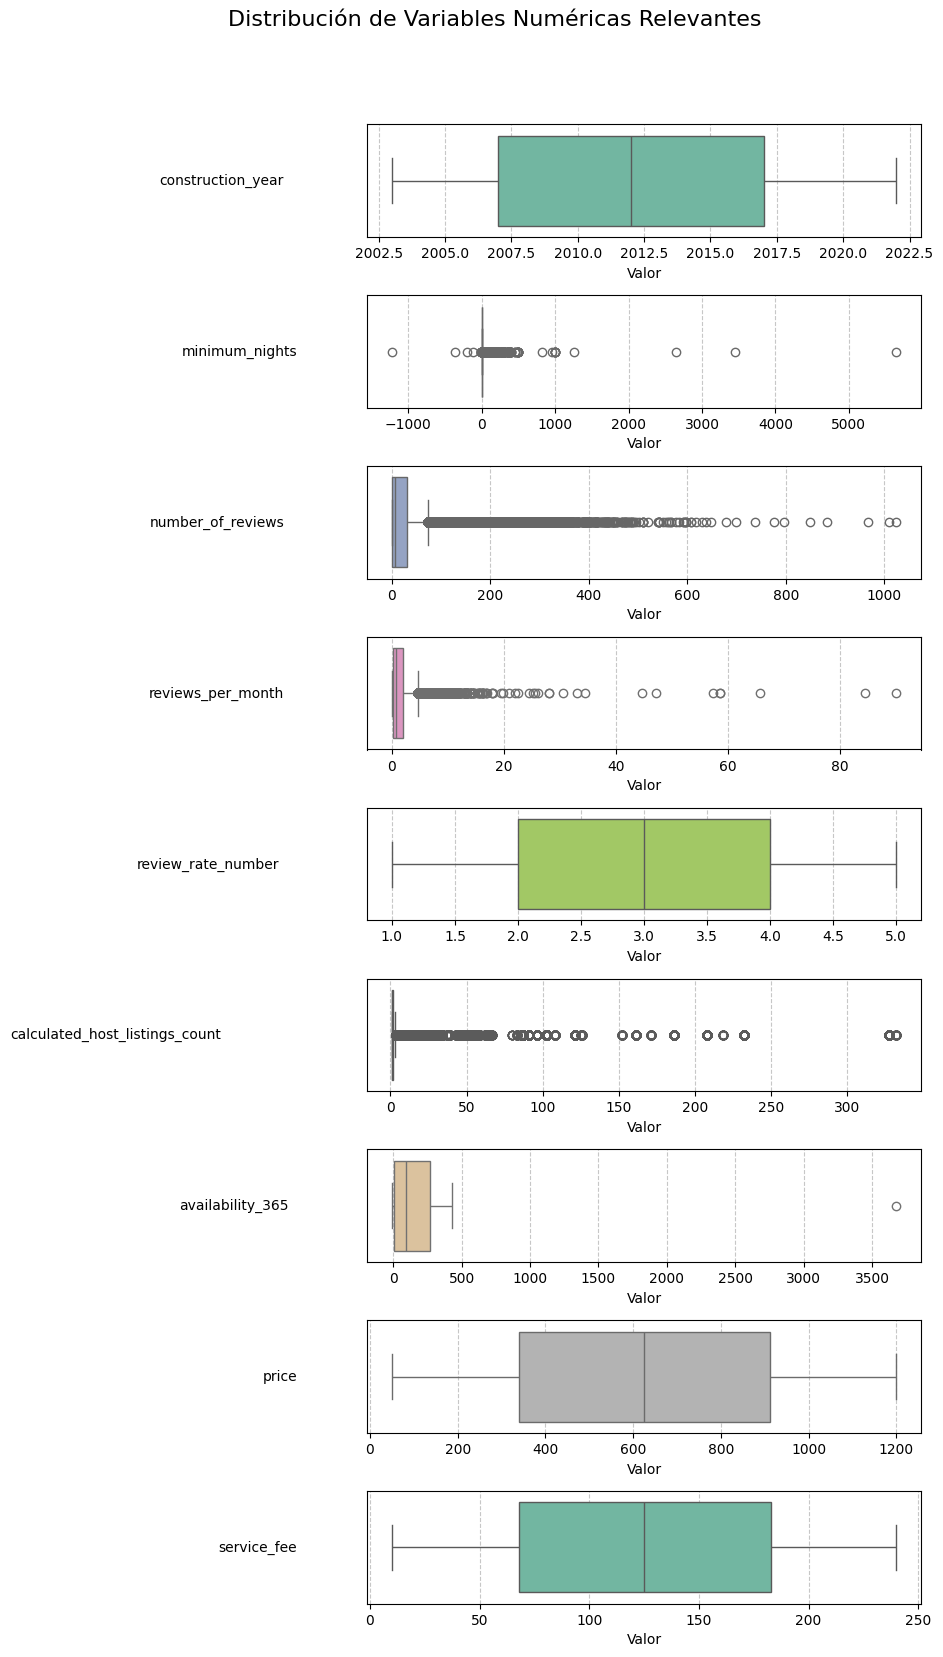

2025-05-11 22:11:07,822 - INFO - Boxplots para columnas numéricas relevantes generados y mostrados.


In [39]:
# Celda 14: Visualización de Distribuciones de Columnas Numéricas con Boxplots (Excluyendo IDs y Coordenadas)
logging.info("Celda 14: Generando boxplots para la distribución de columnas numéricas de df_cleaned (excluyendo id, host_id, lat, long).")

if not df_cleaned.empty:
    # --- Preparar datos numéricos para el plot ---
    # Primero, seleccionamos las columnas que ya son numéricas
    df_numeric_base = df_cleaned.select_dtypes(include=['number', 'Int64', 'float']).copy()

    # Columnas a excluir de la visualización
    cols_to_exclude = ['id', 'host_id', 'lat', 'long']
    
    # Excluir las columnas no deseadas del DataFrame base numérico
    cols_to_plot_from_base = [col for col in df_numeric_base.columns if col not in cols_to_exclude]
    df_numeric_for_plot = df_numeric_base[cols_to_plot_from_base].copy()
    logging.info(f"Columnas numéricas iniciales para plot (después de exclusión): {df_numeric_for_plot.columns.tolist()}")


    # Segundo, intentamos convertir 'price' y 'service_fee' a numérico para este plot específico,
    # solo si no están ya en las columnas excluidas.
    cols_to_convert_and_plot = {}
    if 'price' in df_cleaned.columns and 'price' not in cols_to_exclude and df_cleaned['price'].dtype == 'object':
        converted_price = pd.to_numeric(df_cleaned['price'], errors='coerce')
        if converted_price.notna().any():
            cols_to_convert_and_plot['price'] = converted_price
        else:
            logging.warning("Columna 'price' no pudo ser convertida a numérica para el boxplot.")
            
    if 'service_fee' in df_cleaned.columns and 'service_fee' not in cols_to_exclude and df_cleaned['service_fee'].dtype == 'object':
        converted_service_fee = pd.to_numeric(df_cleaned['service_fee'], errors='coerce')
        if converted_service_fee.notna().any():
            cols_to_convert_and_plot['service_fee'] = converted_service_fee
        else:
            logging.warning("Columna 'service_fee' no pudo ser convertida a numérica para el boxplot.")

    # Añadir las columnas convertidas al DataFrame que se usará para plotear
    for col_name, series_data in cols_to_convert_and_plot.items():
        if col_name not in df_numeric_for_plot.columns:
             df_numeric_for_plot[col_name] = series_data
        elif df_numeric_for_plot[col_name].isna().all() and series_data.notna().any():
             df_numeric_for_plot[col_name] = series_data
    
    logging.info(f"Columnas finales para plotear con boxplots: {df_numeric_for_plot.columns.tolist()}")

    if not df_numeric_for_plot.empty:
        num_cols_to_plot = len(df_numeric_for_plot.columns)
        
        if num_cols_to_plot > 0:
            fig, axes = plt.subplots(nrows=num_cols_to_plot, ncols=1, figsize=(10, num_cols_to_plot * 1.8), sharex=False)
            if num_cols_to_plot == 1:
                axes = [axes]

            fig.suptitle('Distribución de Variables Numéricas Relevantes', fontsize=16, y=1.02)
            colors = sns.color_palette("Set2", num_cols_to_plot)

            for i, col_name in enumerate(df_numeric_for_plot.columns):
                ax = axes[i]
                data_to_plot = df_numeric_for_plot[col_name].dropna()
                
                if not data_to_plot.empty:
                    sns.boxplot(x=data_to_plot, ax=ax, color=colors[i % len(colors)], orient='h')
                    ax.set_ylabel(col_name, rotation=0, ha='right', va='center', fontsize=10, labelpad=len(col_name)*3.5 if len(col_name)>15 else 50)
                    ax.set_xlabel('Valor')
                    ax.tick_params(axis='y', which='major', pad=5)
                    ax.xaxis.grid(True, linestyle='--', alpha=0.7)
                    ax.set_yticks([])
                else:
                    ax.text(0.5, 0.5, 'No hay datos para mostrar', ha='center', va='center')
                    ax.set_ylabel(col_name, rotation=0, ha='right', va='center', fontsize=10, labelpad=len(col_name)*3.5 if len(col_name)>15 else 50)
                    ax.set_yticks([])
                    logging.warning(f"No hay datos válidos para mostrar en el boxplot de la columna '{col_name}'.")

            plt.tight_layout(rect=[0, 0, 0.95, 0.98])
            plt.show()
            logging.info("Boxplots para columnas numéricas relevantes generados y mostrados.")
        else:
            print("No quedaron columnas numéricas relevantes para generar boxplots después de la exclusión.")
            logging.info("No quedaron columnas numéricas relevantes para generar boxplots después de la exclusión.")
            
    else: # Este caso podría darse si todas las columnas numéricas iniciales fueron excluidas
        print("No hay columnas numéricas (o que se puedan convertir a numéricas) para generar boxplots después de la exclusión.")
        logging.info("No hay columnas numéricas válidas en df_cleaned para generar boxplots después de la exclusión.")
else:
    logging.warning("El DataFrame df_cleaned está vacío. No se pueden generar boxplots.")
    print("El DataFrame df_cleaned está vacío. No se pueden generar boxplots.")

2025-05-11 22:11:07,835 - INFO - Celda 15: Analizando 'construction_year' con un gráfico de líneas.


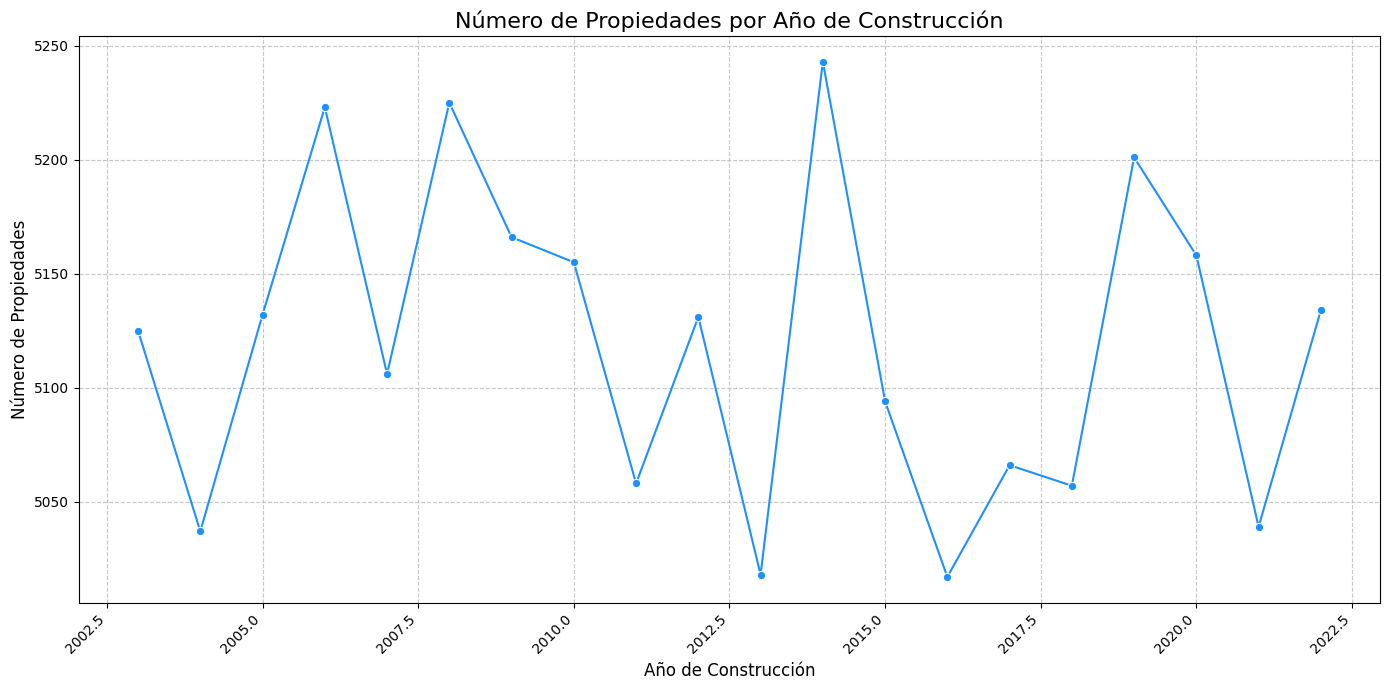

2025-05-11 22:11:08,041 - INFO - Gráfico de líneas para 'construction_year' generado y mostrado.


In [40]:
# Celda 15: Análisis de 'construction_year' con Gráfico de Líneas
logging.info("Celda 15: Analizando 'construction_year' con un gráfico de líneas.")

if not df_cleaned.empty:
    if 'construction_year' in df_cleaned.columns:
        # Asegurarse de que 'construction_year' es numérico y no tiene NaNs para el conteo
        # Ya lo convertimos a Int64 en la limpieza, lo cual permite NAs.
        # Para el conteo, los NAs se ignorarán o podríamos filtrarlos explícitamente.
        
        # Contar la frecuencia de cada año de construcción
        # Usamos .dropna() para excluir los valores nulos antes de contar
        construction_year_counts = df_cleaned['construction_year'].dropna().value_counts().sort_index()
        
        if not construction_year_counts.empty:
            plt.figure(figsize=(14, 7))
            
            # Crear el gráfico de líneas
            sns.lineplot(x=construction_year_counts.index, y=construction_year_counts.values, marker='o', color='dodgerblue')
            
            plt.title('Número de Propiedades por Año de Construcción', fontsize=16)
            plt.xlabel('Año de Construcción', fontsize=12)
            plt.ylabel('Número de Propiedades', fontsize=12)
            plt.grid(True, linestyle='--', alpha=0.7)
            
            # Ajustar los ticks del eje X si hay muchos años para evitar superposición
            # Esto es un ejemplo, podrías necesitar ajustarlo según tus datos
            if len(construction_year_counts.index) > 20:
                # Mostrar cada 5 años si el rango es grande
                step = 5 
                # Asegurarse de que el primer y último año estén incluidos si es posible
                ticks = list(range(int(construction_year_counts.index.min()), int(construction_year_counts.index.max()) + step, step))
                if construction_year_counts.index.min() not in ticks:
                    ticks.insert(0, int(construction_year_counts.index.min()))
                if construction_year_counts.index.max() not in ticks:
                     ticks.append(int(construction_year_counts.index.max()))
                ticks = sorted(list(set(ticks))) # Eliminar duplicados y ordenar
                
                # Filtrar ticks para que no excedan el rango de datos y no sean demasiados
                final_ticks = [t for t in ticks if t >= construction_year_counts.index.min() and t <= construction_year_counts.index.max()]
                if len(final_ticks) > 30 : # Si aún son muchos, tomamos menos
                    step_multiplier = len(final_ticks) // 20
                    final_ticks = final_ticks[::step_multiplier]

                plt.xticks(final_ticks, rotation=45, ha='right')
            else:
                plt.xticks(rotation=45, ha='right')

            plt.tight_layout()
            plt.show()
            
            logging.info("Gráfico de líneas para 'construction_year' generado y mostrado.")
            
        else:
            print("No hay datos válidos en 'construction_year' para generar el gráfico después de quitar NaNs.")
            logging.warning("No hay datos válidos en 'construction_year' para el gráfico después de quitar NaNs.")
    else:
        print("La columna 'construction_year' no existe en df_cleaned.")
        logging.warning("La columna 'construction_year' no se encontró en df_cleaned.")
else:
    logging.warning("El DataFrame df_cleaned está vacío. No se puede analizar 'construction_year'.")
    print("El DataFrame df_cleaned está vacío. No se puede analizar 'construction_year'.")

2025-05-11 22:11:08,056 - INFO - Celda 16: Analizando 'minimum_nights' con un gráfico de barras.
2025-05-11 22:11:08,077 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_74930/2257587378.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_min_nights.index.astype(str), y=top_n_min_nights.values,
2025-05-11 22:11:08,084 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


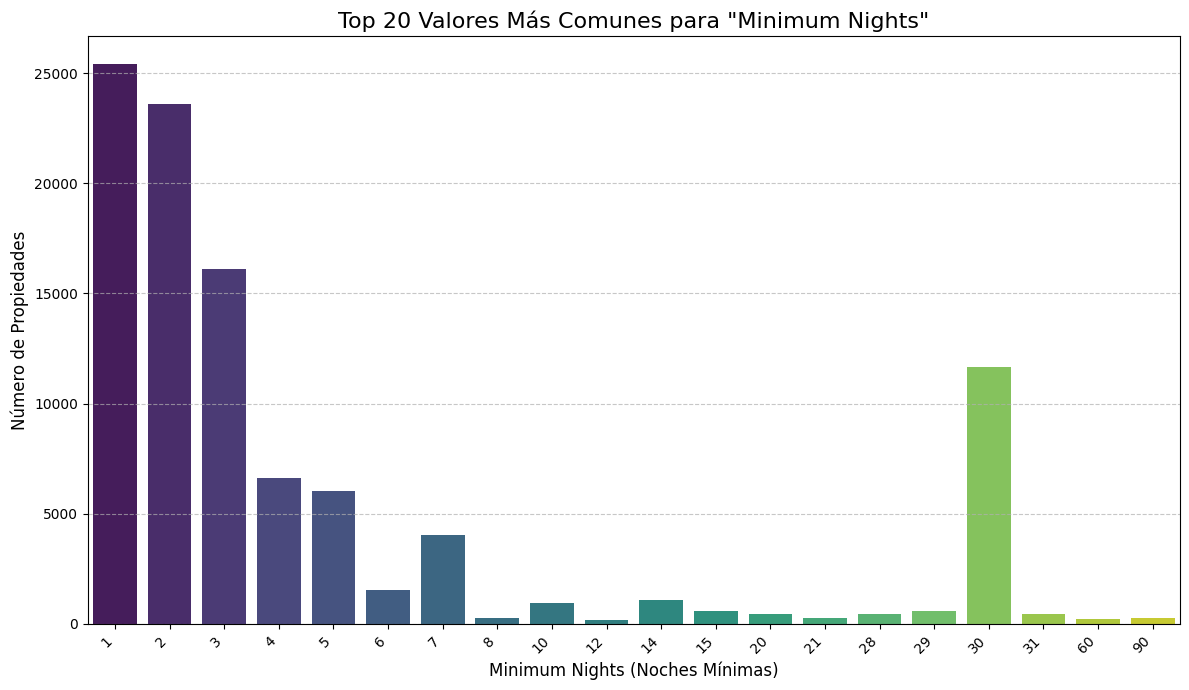

2025-05-11 22:11:08,407 - INFO - Gráfico de barras para los top 20 'minimum_nights' generado y mostrado.


|   minimum_nights |   count |
|-----------------:|--------:|
|                1 |   25421 |
|                2 |   23604 |
|                3 |   16113 |
|               30 |   11653 |
|                4 |    6625 |
|                5 |    6051 |
|                7 |    4039 |
|                6 |    1538 |
|               14 |    1077 |
|               10 |     932 |
|               15 |     593 |
|               29 |     569 |
|               31 |     453 |
|               20 |     440 |
|               28 |     432 |
|               21 |     256 |
|               90 |     248 |
|                8 |     246 |
|               60 |     234 |
|               12 |     171 |


In [41]:
# Celda 16: Análisis de 'minimum_nights' con Gráfico de Barras
logging.info("Celda 16: Analizando 'minimum_nights' con un gráfico de barras.")

if not df_cleaned.empty:
    if 'minimum_nights' in df_cleaned.columns:
        # 'minimum_nights' ya fue convertido a Int64, que permite NAs.
        
        # Contar la frecuencia de cada valor de 'minimum_nights'
        # Usamos .dropna() para excluir los valores nulos antes de contar
        min_nights_counts = df_cleaned['minimum_nights'].dropna().value_counts()
        
        if not min_nights_counts.empty:
            
            # --- Opción 1: Gráfico de barras de los N valores más comunes ---
            N = 20 # Número de valores más comunes a mostrar
            top_n_min_nights = min_nights_counts.nlargest(N)
            
            if not top_n_min_nights.empty:
                plt.figure(figsize=(12, 7))
                
                # Crear el gráfico de barras con Seaborn
                # Aseguramos que el índice (valores de minimum_nights) se trate como categórico para el orden correcto
                sns.barplot(x=top_n_min_nights.index.astype(str), y=top_n_min_nights.values, 
                            palette="viridis", order=top_n_min_nights.index.astype(str).sort_values(key=lambda x: x.astype(int)))
                
                plt.title(f'Top {N} Valores Más Comunes para "Minimum Nights"', fontsize=16)
                plt.xlabel('Minimum Nights (Noches Mínimas)', fontsize=12)
                plt.ylabel('Número de Propiedades', fontsize=12)
                plt.xticks(rotation=45, ha='right')
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.tight_layout()
                plt.show()
                
                logging.info(f"Gráfico de barras para los top {N} 'minimum_nights' generado y mostrado.")

                print(top_n_min_nights.to_markdown())
            else:
                print(f"No hay suficientes datos para mostrar los top {N} valores de 'minimum_nights'.")
                logging.info(f"No hay suficientes datos para mostrar los top {N} valores de 'minimum_nights'.")

        else:
            print("No hay datos válidos en 'minimum_nights' para generar el gráfico después de quitar NaNs.")
            logging.warning("No hay datos válidos en 'minimum_nights' para el gráfico después de quitar NaNs.")
    else:
        print("La columna 'minimum_nights' no existe en df_cleaned.")
        logging.warning("La columna 'minimum_nights' no se encontró en df_cleaned.")
else:
    logging.warning("El DataFrame df_cleaned está vacío. No se puede analizar 'minimum_nights'.")
    print("El DataFrame df_cleaned está vacío. No se puede analizar 'minimum_nights'.")

2025-05-11 22:11:08,425 - INFO - Celda 17: Determinando el año con mayor actividad de reviews basado en 'last_review'.
2025-05-11 22:11:08,434 - INFO - El año con mayor actividad de 'últimos reviews' fue 2019 con 42931 reviews.
2025-05-11 22:11:08,451 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_74930/859653412.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index.astype(int), y=year_counts.values, palette="coolwarm") # astype(int) para que se muestren como enteros
2025-05-11 22:11:08,458 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropr

El año con mayor actividad de 'últimos reviews' fue: 2019
Número de 'últimos reviews' en ese año: 42931


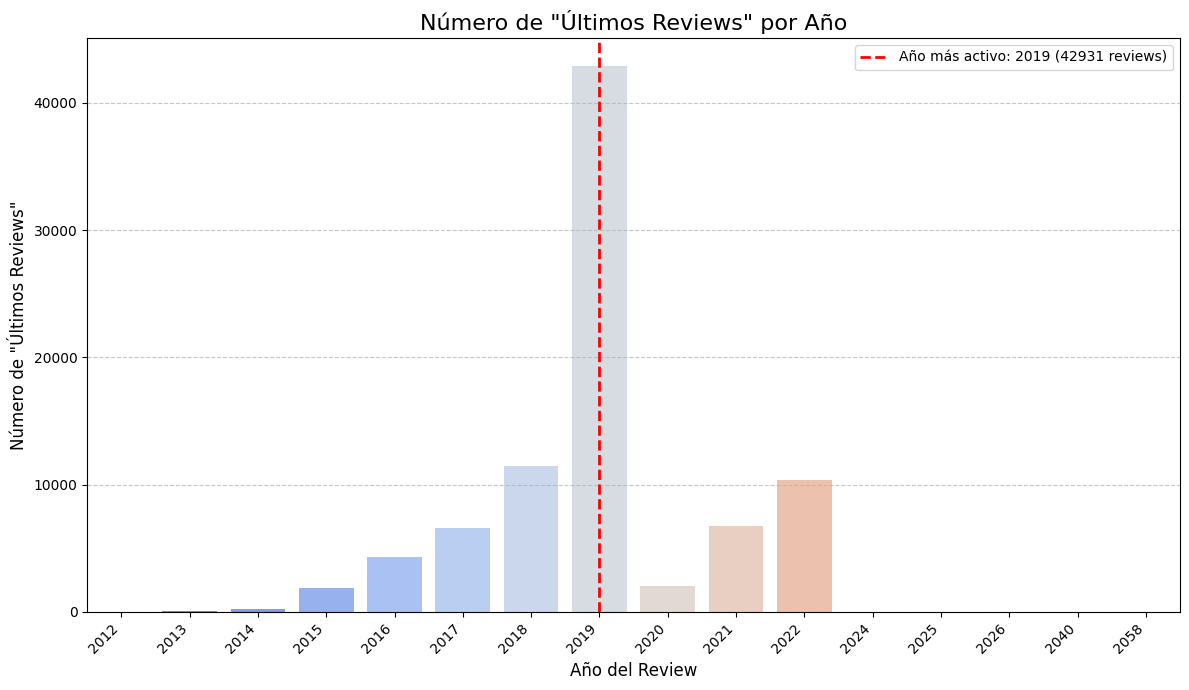

2025-05-11 22:11:08,760 - INFO - Gráfico de barras de actividad de reviews por año generado y mostrado.



Actividad de 'últimos reviews' por año:
|   last_review |   count |
|--------------:|--------:|
|          2012 |      26 |
|          2013 |      80 |
|          2014 |     246 |
|          2015 |    1874 |
|          2016 |    4316 |
|          2017 |    6601 |
|          2018 |   11455 |
|          2019 |   42931 |
|          2020 |    2063 |
|          2021 |    6740 |
|          2022 |   10369 |
|          2024 |       1 |
|          2025 |       1 |
|          2026 |       1 |
|          2040 |       1 |
|          2058 |       1 |


In [42]:
# Celda 17: Determinar el Año con Mayor Actividad de Reviews (basado en 'last_review')
logging.info("Celda 17: Determinando el año con mayor actividad de reviews basado en 'last_review'.")

if not df_cleaned.empty:
    if 'last_review' in df_cleaned.columns and df_cleaned['last_review'].dtype == 'datetime64[ns]':
        
        # Extraer el año de la columna 'last_review'
        # Primero, nos aseguramos de no operar sobre NaT (Not a Time) valores
        valid_last_reviews = df_cleaned['last_review'].dropna()
        
        if not valid_last_reviews.empty:
            review_years = valid_last_reviews.dt.year
            
            # Contar la frecuencia de reviews por año
            year_counts = review_years.value_counts().sort_index() # sort_index para orden cronológico
            
            if not year_counts.empty:
                # Encontrar el año con el máximo número de reviews
                most_active_year = year_counts.idxmax()
                max_reviews_count = year_counts.max()
                
                print(f"El año con mayor actividad de 'últimos reviews' fue: {most_active_year}")
                print(f"Número de 'últimos reviews' en ese año: {max_reviews_count}")
                logging.info(f"El año con mayor actividad de 'últimos reviews' fue {most_active_year} con {max_reviews_count} reviews.")

                # --- Visualización: Gráfico de barras de actividad de reviews por año ---
                plt.figure(figsize=(12, 7))
                sns.barplot(x=year_counts.index.astype(int), y=year_counts.values, palette="coolwarm") # astype(int) para que se muestren como enteros
                
                plt.title('Número de "Últimos Reviews" por Año', fontsize=16)
                plt.xlabel('Año del Review', fontsize=12)
                plt.ylabel('Número de "Últimos Reviews"', fontsize=12)
                plt.xticks(rotation=45, ha='right')
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                
                # Resaltar el año con más actividad
                plt.axvline(x=year_counts.index.get_loc(most_active_year), color='red', linestyle='--', linewidth=2, 
                            label=f'Año más activo: {most_active_year} ({max_reviews_count} reviews)')
                # Ajustar el posicionamiento de axvline si los xticks no son continuos o no empiezan en 0
                # Esto requiere que el índice de year_counts (los años) se use para encontrar la posición.
                # Si el índice de year_counts son los años directamente:
                # plt.scatter(most_active_year, max_reviews_count, color='red', s=100, zorder=5, label=f'Año más activo: {most_active_year}')

                plt.legend()
                plt.tight_layout()
                plt.show()
                
                logging.info("Gráfico de barras de actividad de reviews por año generado y mostrado.")

                print("\nActividad de 'últimos reviews' por año:")
                print(year_counts.to_markdown())
                
            else:
                print("No hay suficientes datos de años de review para determinar la actividad.")
                logging.warning("No hay datos de años de review después de procesar 'last_review'.")
        else:
            print("La columna 'last_review' no contiene fechas válidas (después de quitar NaT).")
            logging.warning("La columna 'last_review' está vacía o solo contiene NaT.")
            
    elif 'last_review' not in df_cleaned.columns:
        print("La columna 'last_review' no existe en df_cleaned.")
        logging.warning("La columna 'last_review' no se encontró en df_cleaned.")
    else: # Si existe pero no es datetime
        print(f"La columna 'last_review' no es de tipo datetime. Su tipo es: {df_cleaned['last_review'].dtype}")
        logging.warning(f"La columna 'last_review' no es de tipo datetime ({df_cleaned['last_review'].dtype}). No se puede extraer el año.")
else:
    logging.warning("El DataFrame df_cleaned está vacío. No se puede analizar la actividad de reviews.")
    print("El DataFrame df_cleaned está vacío. No se puede analizar la actividad de reviews.")

2025-05-11 22:11:08,779 - INFO - Celda 18: Analizando 'number_of_reviews' y 'reviews_per_month'.
2025-05-11 22:11:08,783 - INFO - Analizando la columna: number_of_reviews



--- Estadísticas Descriptivas para 'number_of_reviews' ---
|       |   number_of_reviews |
|:------|--------------------:|
| count |         102416      |
| mean  |             27.4837 |
| std   |             49.509  |
| min   |              0      |
| 25%   |              1      |
| 50%   |              7      |
| 75%   |             30      |
| max   |           1024      |


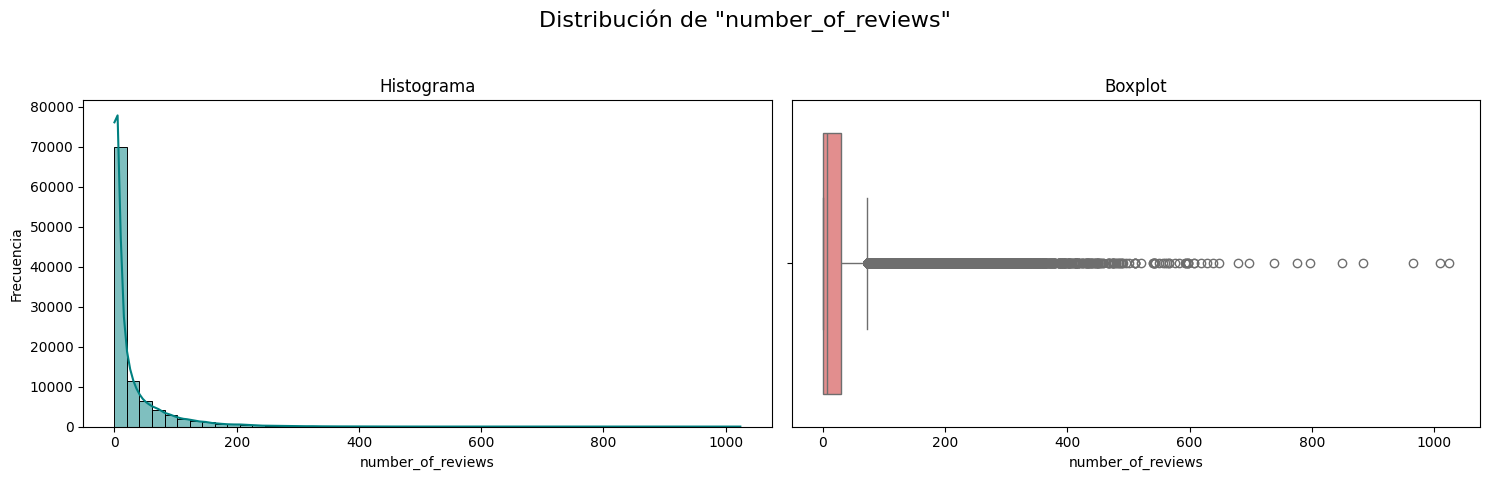

2025-05-11 22:11:09,724 - INFO - La columna 'number_of_reviews' está sesgada (skewness: 3.84). Mostrando con transformación logarítmica.


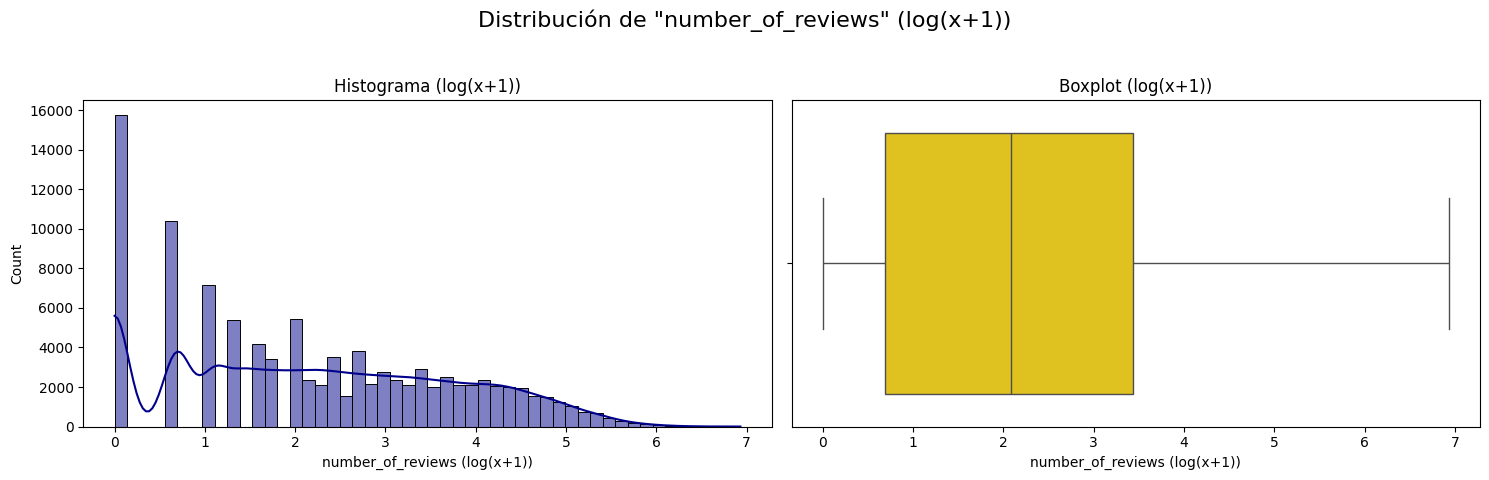

2025-05-11 22:11:10,489 - INFO - Analizando la columna: reviews_per_month



--- Estadísticas Descriptivas para 'reviews_per_month' ---
|       |   reviews_per_month |
|:------|--------------------:|
| count |         86720       |
| mean  |             1.37402 |
| std   |             1.74662 |
| min   |             0.01    |
| 25%   |             0.22    |
| 50%   |             0.74    |
| 75%   |             2       |
| max   |            90       |


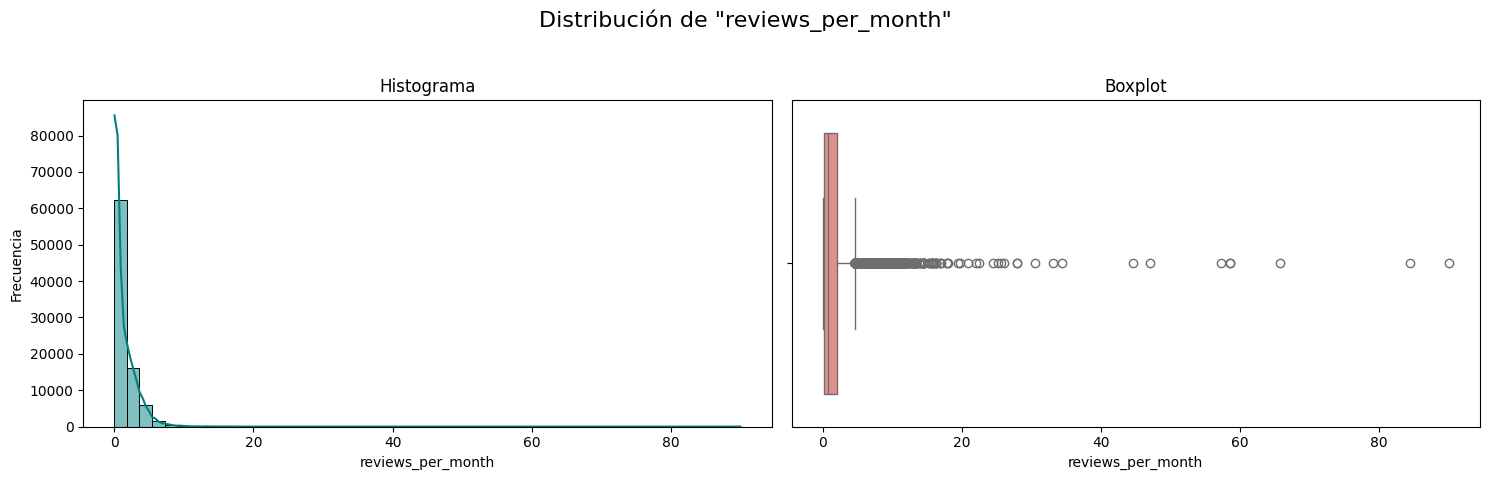

2025-05-11 22:11:11,221 - INFO - La columna 'reviews_per_month' está sesgada (skewness: 7.03). Mostrando con transformación logarítmica.


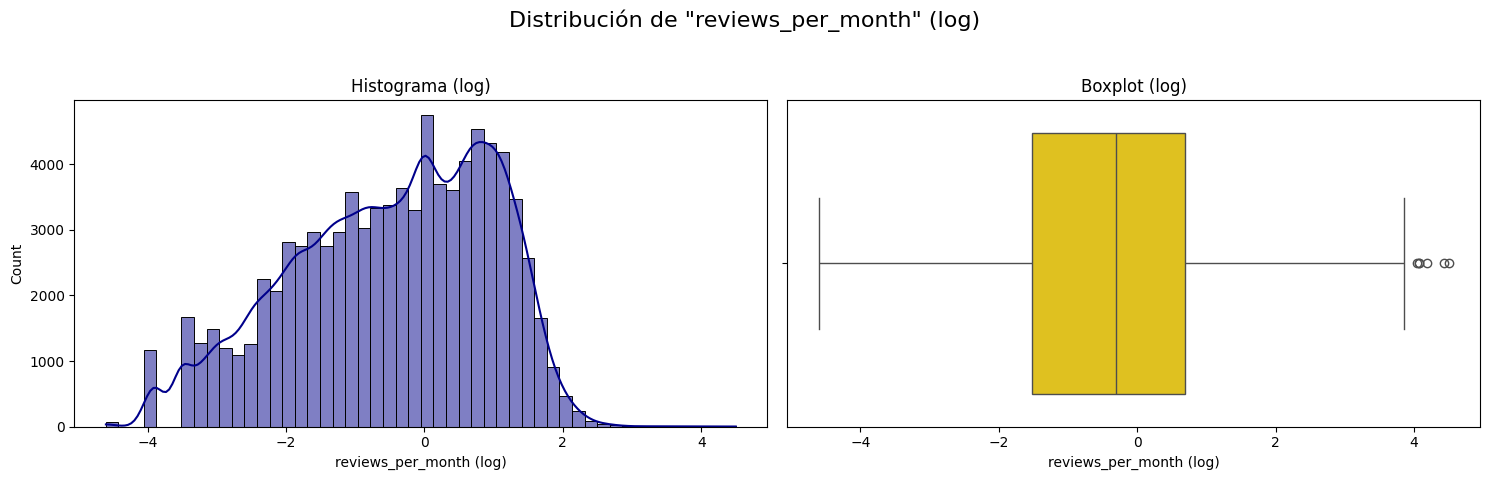

In [43]:
# Celda 18: Análisis de 'number_of_reviews' y 'reviews_per_month'
logging.info("Celda 18: Analizando 'number_of_reviews' y 'reviews_per_month'.")

if not df_cleaned.empty:
    cols_to_analyze = ['number_of_reviews', 'reviews_per_month']
    
    for col_name in cols_to_analyze:
        if col_name in df_cleaned.columns:
            # Filtrar NaNs para las visualizaciones
            data_series = df_cleaned[col_name].dropna()
            
            if not data_series.empty:
                logging.info(f"Analizando la columna: {col_name}")
                
                # --- Estadísticas Descriptivas ---
                print(f"\n--- Estadísticas Descriptivas para '{col_name}' ---")
                print(data_series.describe().to_markdown())

                # --- Visualizaciones ---
                fig, axes = plt.subplots(1, 2, figsize=(15, 5)) # Un subplot para histograma, otro para boxplot
                fig.suptitle(f'Distribución de "{col_name}"', fontsize=16)
                
                # Histograma
                sns.histplot(data_series, bins=50, kde=True, ax=axes[0], color='teal')
                axes[0].set_title('Histograma')
                axes[0].set_xlabel(col_name)
                axes[0].set_ylabel('Frecuencia')
                
                # Boxplot
                sns.boxplot(x=data_series, ax=axes[1], color='lightcoral', orient='h')
                axes[1].set_title('Boxplot')
                axes[1].set_xlabel(col_name)
                
                plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajuste para el suptitle
                plt.show()
                
                # Considerar transformación logarítmica si la distribución está muy sesgada
                if data_series.skew() > 2 or data_series.skew() < -2: # Umbral de ejemplo para sesgo
                    logging.info(f"La columna '{col_name}' está sesgada (skewness: {data_series.skew():.2f}). Mostrando con transformación logarítmica.")
                    
                    # Asegurarse de que no haya ceros o negativos si se aplica log(x)
                    # Si hay ceros, usar log(x+1)
                    data_for_log = data_series[data_series > 0] if (data_series <= 0).any() else data_series
                    if (data_series == 0).any() and not (data_series < 0).any(): # Si hay ceros pero no negativos
                        data_for_log = data_series + 1 # log(x+1)
                        log_label_suffix = " (log(x+1))"
                    elif (data_series <= 0).any(): # Si hay negativos o ceros y queremos ser cautos
                         logging.warning(f"No se puede aplicar log directamente a '{col_name}' debido a valores no positivos y no se usará log(x+1) automáticamente. Se omitirá el plot logarítmico.")
                         continue # Saltar al siguiente plot o columna
                    else:
                        log_label_suffix = " (log)"


                    if not data_for_log.empty and not (data_for_log <= 0).any() : # Doble chequeo antes de np.log
                        log_data = np.log(data_for_log)
                        
                        fig_log, axes_log = plt.subplots(1, 2, figsize=(15, 5))
                        fig_log.suptitle(f'Distribución de "{col_name}"{log_label_suffix}', fontsize=16)
                        
                        sns.histplot(log_data, bins=50, kde=True, ax=axes_log[0], color='darkblue')
                        axes_log[0].set_title(f'Histograma{log_label_suffix}')
                        axes_log[0].set_xlabel(f'{col_name}{log_label_suffix}')
                        
                        sns.boxplot(x=log_data, ax=axes_log[1], color='gold', orient='h')
                        axes_log[1].set_title(f'Boxplot{log_label_suffix}')
                        axes_log[1].set_xlabel(f'{col_name}{log_label_suffix}')
                        
                        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
                        plt.show()
                    elif not data_for_log.empty:
                        logging.warning(f"Después de ajustar para log, la serie para '{col_name}' aún contiene valores no positivos. Se omitirá el plot logarítmico.")

            else:
                print(f"La columna '{col_name}' no contiene datos válidos después de quitar NaNs.")
                logging.warning(f"La columna '{col_name}' está vacía o solo contiene NaNs.")
        else:
            print(f"La columna '{col_name}' no existe en df_cleaned.")
            logging.warning(f"La columna '{col_name}' no se encontró en df_cleaned.")
else:
    logging.warning("El DataFrame df_cleaned está vacío.")
    print("El DataFrame df_cleaned está vacío.")

2025-05-11 22:11:11,838 - INFO - Celda 19: Analizando 'review_rate_number'.
2025-05-11 22:11:11,842 - INFO - Generando gráfico de barras para 'review_rate_number'.
2025-05-11 22:11:11,856 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_74930/314468737.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_rate_counts.index.astype(str), y=review_rate_counts.values, palette="coolwarm_r") # Usar astype(str) para tratar como categorías
2025-05-11 22:11:11,863 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


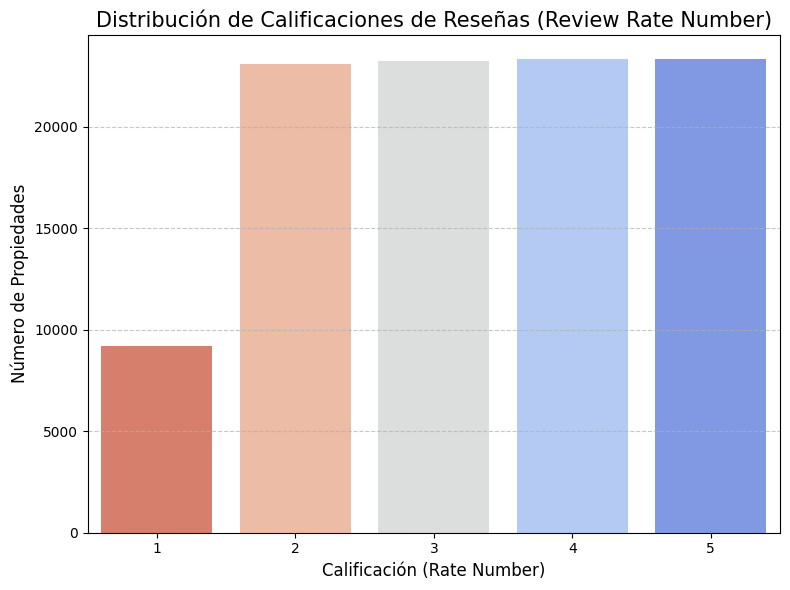


Frecuencia de cada 'review_rate_number':
|   review_rate_number |   count |
|---------------------:|--------:|
|                    1 |    9212 |
|                    2 |   23098 |
|                    3 |   23265 |
|                    4 |   23329 |
|                    5 |   23369 |


In [44]:
# Celda 19: Análisis de 'review_rate_number'
logging.info("Celda 19: Analizando 'review_rate_number'.")

if not df_cleaned.empty:
    if 'review_rate_number' in df_cleaned.columns:
        # Esta columna debería contener puntajes discretos (ej. 1 a 5)
        review_rate_counts = df_cleaned['review_rate_number'].dropna().value_counts().sort_index()
        
        if not review_rate_counts.empty:
            logging.info("Generando gráfico de barras para 'review_rate_number'.")
            
            plt.figure(figsize=(8, 6))
            sns.barplot(x=review_rate_counts.index.astype(str), y=review_rate_counts.values, palette="coolwarm_r") # Usar astype(str) para tratar como categorías
            
            plt.title('Distribución de Calificaciones de Reseñas (Review Rate Number)', fontsize=15)
            plt.xlabel('Calificación (Rate Number)', fontsize=12)
            plt.ylabel('Número de Propiedades', fontsize=12)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            
            print("\nFrecuencia de cada 'review_rate_number':")
            print(review_rate_counts.to_markdown())
        else:
            print("La columna 'review_rate_number' no contiene datos válidos después de quitar NaNs.")
            logging.warning("La columna 'review_rate_number' está vacía o solo contiene NaNs.")
    else:
        print("La columna 'review_rate_number' no existe en df_cleaned.")
        logging.warning("La columna 'review_rate_number' no se encontró en df_cleaned.")
else:
    logging.warning("El DataFrame df_cleaned está vacío.")
    print("El DataFrame df_cleaned está vacío.")

2025-05-11 22:11:12,039 - INFO - Celda 20: Generando matriz de histogramas y boxplots para columnas numéricas restantes.
2025-05-11 22:11:12,107 - INFO - Columna 'price' convertida a numérica para la visualización.
2025-05-11 22:11:12,149 - INFO - Columna 'service_fee' convertida a numérica para la visualización.


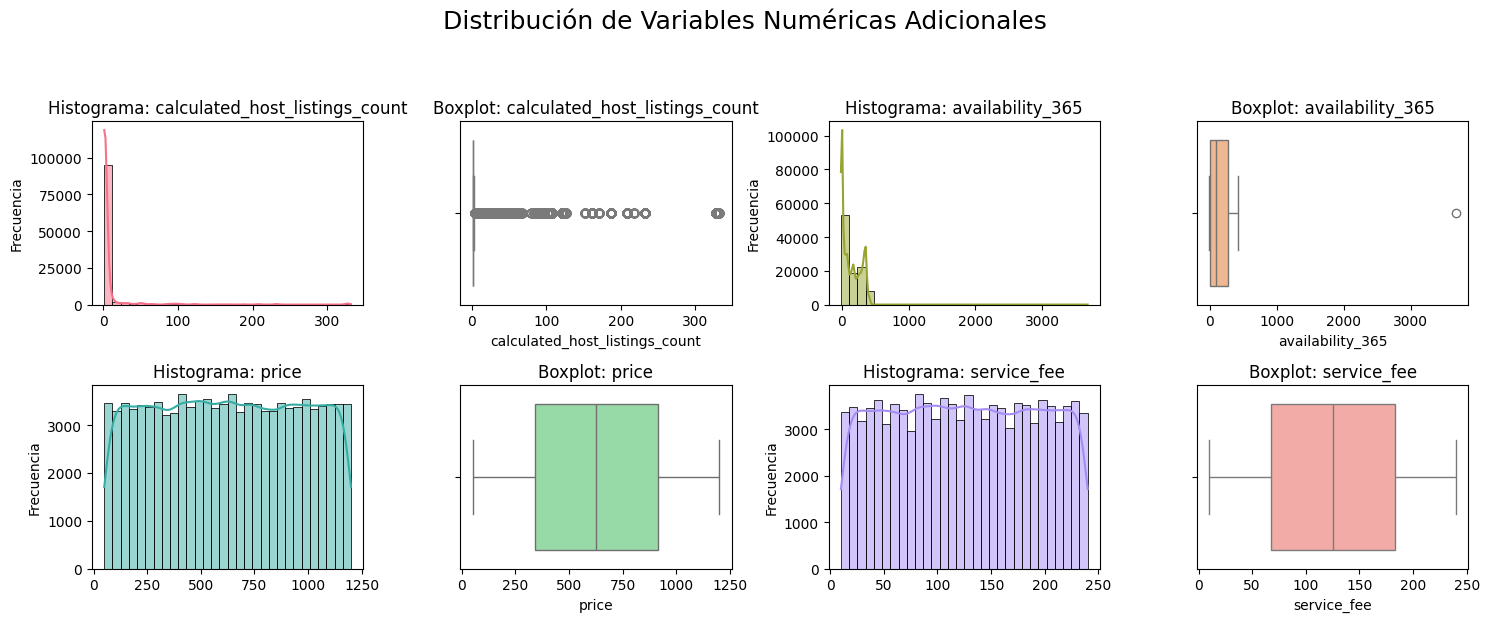

2025-05-11 22:11:14,598 - INFO - Matriz de histogramas y boxplots generada.


In [45]:
# Celda 20: Matriz de Histogramas y Boxplots para Columnas Numéricas Restantes
logging.info("Celda 20: Generando matriz de histogramas y boxplots para columnas numéricas restantes.")

if not df_cleaned.empty:
    # Columnas a analizar en esta matriz
    cols_for_matrix = [
        'calculated_host_listings_count', 
        'availability_365', 
        'price',  # Se convertirá a numérico
        'service_fee' # Se convertirá a numérico
    ]
    
    # Crear un DataFrame temporal para las visualizaciones, manejando la conversión
    df_plot_temp = pd.DataFrame()
    valid_cols_for_plot = []

    for col_name in cols_for_matrix:
        if col_name in df_cleaned.columns:
            if df_cleaned[col_name].dtype in ['Int64', 'float64', 'int64']: # Ya es numérico
                df_plot_temp[col_name] = df_cleaned[col_name]
                valid_cols_for_plot.append(col_name)
            elif col_name in ['price', 'service_fee'] and df_cleaned[col_name].dtype == 'object': # Convertir price/service_fee
                numeric_series = pd.to_numeric(df_cleaned[col_name], errors='coerce')
                if numeric_series.notna().any():
                    df_plot_temp[col_name] = numeric_series
                    valid_cols_for_plot.append(col_name)
                    logging.info(f"Columna '{col_name}' convertida a numérica para la visualización.")
                else:
                    logging.warning(f"No se pudo convertir '{col_name}' a numérico para el plot (todos NaN o no numéricos).")
            else:
                 logging.warning(f"Columna '{col_name}' no es directamente numérica ni 'price'/'service_fee' de tipo object. Se omitirá del plot matricial.")
        else:
            logging.warning(f"Columna '{col_name}' no encontrada en df_cleaned. Se omitirá.")

    if not df_plot_temp.empty and valid_cols_for_plot:
        num_valid_cols = len(valid_cols_for_plot)
        
        # Configurar la matriz de subplots: 2 columnas de subplots
        # El número de filas se calcula basándose en el número de columnas a plotear
        n_cols_subplot = 2
        n_rows_subplot = (num_valid_cols + n_cols_subplot - 1) // n_cols_subplot # División entera redondeada hacia arriba
        
        fig, axes = plt.subplots(n_rows_subplot, n_cols_subplot * 2, figsize=(15, n_rows_subplot * 3))
        # Cada "columna" de la lista 'valid_cols_for_plot' ocupará dos columnas en la matriz de subplots (una para hist, una para box)
        
        fig.suptitle('Distribución de Variables Numéricas Adicionales', fontsize=18, y=1.03)
        
        plot_idx = 0 # Índice para rastrear la columna actual en valid_cols_for_plot
        for r in range(n_rows_subplot):
            for c_group in range(n_cols_subplot): # c_group es 0 o 1 (para dos grupos de hist/box por fila)
                if plot_idx < num_valid_cols:
                    col_name_current = valid_cols_for_plot[plot_idx]
                    data_series_current = df_plot_temp[col_name_current].dropna()

                    # Determinar los índices correctos para los ejes
                    # El eje del histograma estará en la columna c_group * 2
                    # El eje del boxplot estará en la columna c_group * 2 + 1
                    ax_hist_idx = c_group * 2
                    ax_box_idx = c_group * 2 + 1
                    
                    # Manejar el caso de una sola fila de subplots
                    current_axes_row = axes[r] if n_rows_subplot > 1 else axes


                    if not data_series_current.empty:
                        # Histograma
                        ax_h = current_axes_row[ax_hist_idx] if n_cols_subplot > 0 else current_axes_row # n_cols_subplot siempre será >0 aquí
                        sns.histplot(data_series_current, bins=30, kde=True, ax=ax_h, color=sns.color_palette("husl", num_valid_cols)[plot_idx])
                        ax_h.set_title(f'Histograma: {col_name_current}')
                        ax_h.set_xlabel('') # Dejar xlabel vacío para más espacio
                        ax_h.set_ylabel('Frecuencia')

                        # Boxplot (horizontal)
                        ax_b = current_axes_row[ax_box_idx] if n_cols_subplot > 0 else current_axes_row
                        sns.boxplot(x=data_series_current, ax=ax_b, orient='h', color=sns.color_palette("pastel", num_valid_cols)[plot_idx])
                        ax_b.set_title(f'Boxplot: {col_name_current}')
                        ax_b.set_xlabel(col_name_current) # Poner el nombre de la columna como xlabel del boxplot
                    else:
                        # Si no hay datos, mostrar mensaje en ambos subplots asignados
                        ax_h = current_axes_row[ax_hist_idx]
                        ax_h.text(0.5, 0.5, f'No hay datos para\n{col_name_current}', ha='center', va='center')
                        ax_h.set_title(f'Histograma: {col_name_current}')
                        
                        ax_b = current_axes_row[ax_box_idx]
                        ax_b.text(0.5, 0.5, f'No hay datos para\n{col_name_current}', ha='center', va='center')
                        ax_b.set_title(f'Boxplot: {col_name_current}')
                        
                    plot_idx += 1
                else:
                    # Si hay subplots vacíos (porque num_valid_cols no es múltiplo de n_cols_subplot), los ocultamos
                    if r < n_rows_subplot and c_group * 2 < n_cols_subplot * 2:
                        current_axes_row[c_group * 2].axis('off')
                    if r < n_rows_subplot and c_group * 2 + 1 < n_cols_subplot * 2:
                         current_axes_row[c_group * 2 + 1].axis('off')


        plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajustar para el suptitle
        plt.show()
        logging.info("Matriz de histogramas y boxplots generada.")

    elif df_plot_temp.empty:
        print("No hay columnas válidas para generar la matriz de visualización después de la conversión y filtrado.")
        logging.warning("df_plot_temp está vacío. No se puede generar la matriz.")
else:
    logging.warning("El DataFrame df_cleaned está vacío.")
    print("El DataFrame df_cleaned está vacío.")